In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The data includes information about energy production in various countries on a monthly basis from 2010 to 2022. The energy production is measured in gigawatt-hours (GWh) and covers a range of energy products including hydro, wind, solar, geothermal, nuclear, fossil fuels, and others.

##### The dataset columns include:

##### COUNTRY: Name of the country
##### CODE_TIME: A code that represents the month and year (e.g., JAN2010 for January 2010)
##### TIME: The month and year in a more human-readable format (e.g., January 2010)
##### YEAR: The year of the data point
##### MONTH: The month of the data point as a number (1-12)
##### MONTH_NAME: The month of the data point as a string (e.g., January)
##### PRODUCT: The type of energy product (e.g., Hydro, Wind, Solar)
##### VALUE: The amount of electricity generated in gigawatt-hours (GWh)
##### DISPLAY_ORDER: The order in which the products should be displayed
##### yearToDate: The amount of electricity generated for the current year up to the current month in GWh
##### previousYearToDate: The amount of electricity generated for the previous year up to the current month in GWh
##### share: The share of the product in the total electricity generation for the country in decimal format

In [2]:
df = pd.read_csv("D:\\data\\energy_consumption.csv")
df.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181915 entries, 0 to 181914
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COUNTRY             181915 non-null  object 
 1   CODE_TIME           181915 non-null  object 
 2   TIME                181915 non-null  object 
 3   YEAR                181915 non-null  int64  
 4   MONTH               181915 non-null  int64  
 5   MONTH_NAME          181915 non-null  object 
 6   PRODUCT             181915 non-null  object 
 7   VALUE               181915 non-null  float64
 8   DISPLAY_ORDER       181915 non-null  int64  
 9   yearToDate          181915 non-null  float64
 10  previousYearToDate  164810 non-null  float64
 11  share               181915 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 16.7+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,181915.0,2016.456818,3.657532e+00,2010.000000,2013.000000,2017.000000,2020.000000,2.022000e+03
MONTH,181915.0,6.498145,3.452288e+00,1.000000,3.000000,6.000000,9.000000,1.200000e+01
VALUE,181915.0,20912.924486,8.584724e+04,-6852.344000,66.851890,766.399021,4989.494500,1.001529e+06
DISPLAY_ORDER,181915.0,14.418410,7.819235e+00,1.000000,8.000000,15.000000,21.000000,2.700000e+01
yearToDate,181915.0,250954.406289,1.026864e+06,-66670.000000,883.186969,9558.855000,59275.169385,1.082156e+07
previousYearToDate,164810.0,138208.266459,6.383465e+05,-66670.000000,398.896745,4356.564500,30250.868324,1.082156e+07
share,181915.0,0.289057,4.273470e-01,-4.649269,0.009907,0.082530,0.511302,5.649269e+00


In [5]:
df.columns = df.columns.str.lower()
df

,country,code_time,time,year,month,month_name,product,value,display_order,yeartodate,previousyeartodate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728000,1,1.647189e+04,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469000,2,4.940909e+03,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216000,3,9.082380e+02,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083000,4,9.960000e-01,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730000,7,2.143030e+05,NaN,0.930108
...,...,...,...,...,...,...,...,...,...,...,...,...
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,292417.548132,23,3.355042e+06,3.320634e+06,0.791164
181911,United States,DEC2022,December 2022,2022,12,December,Others,8017.840957,24,5.393606e+04,4.899452e+04,0.021693
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,6133.265943,25,7.100997e+04,7.242158e+04,0.016594
181913,United States,DEC2022,December 2022,2022,12,December,Low carbon,146425.474534,26,1.749805e+06,1.670531e+06,0.396168


In [6]:
# as we have different columns for date and time so we want to keep only required one
data=df.drop(['code_time','time'], axis=1)
data

,country,year,month,month_name,product,value,display_order,yeartodate,previousyeartodate,share
0,Australia,2010,1,January,Hydro,990.728000,1,1.647189e+04,NaN,0.047771
1,Australia,2010,1,January,Wind,409.469000,2,4.940909e+03,NaN,0.019744
2,Australia,2010,1,January,Solar,49.216000,3,9.082380e+02,NaN,0.002373
3,Australia,2010,1,January,Geothermal,0.083000,4,9.960000e-01,NaN,0.000004
4,Australia,2010,1,January,Total combustible fuels,19289.730000,7,2.143030e+05,NaN,0.930108
...,...,...,...,...,...,...,...,...,...,...
181910,United States,2022,12,December,Non-renewables,292417.548132,23,3.355042e+06,3.320634e+06,0.791164
181911,United States,2022,12,December,Others,8017.840957,24,5.393606e+04,4.899452e+04,0.021693
181912,United States,2022,12,December,Other renewables aggregated,6133.265943,25,7.100997e+04,7.242158e+04,0.016594
181913,United States,2022,12,December,Low carbon,146425.474534,26,1.749805e+06,1.670531e+06,0.396168


In [7]:
print('unique country :', data['country'].nunique())
print('total year :',data['year'].nunique())
print('total month :',data['month'].nunique())
print('Types of product :',data['product'].nunique())
print('Total order :',data['display_order'].nunique())

unique country : 52
total year : 13
total month : 12
Types of product : 27
Total order : 27


In [8]:
data['product'].unique()

array(['Hydro', 'Wind', 'Solar', 'Geothermal', 'Total combustible fuels',
       'Coal', 'Oil', 'Natural gas', 'Combustible renewables',
       'Net electricity production', 'Electricity supplied',
       'Used for pumped storage', 'Distribution losses',
       'Final consumption', 'Renewables', 'Non-renewables', 'Others',
       'Other renewables aggregated', 'Low carbon', 'Fossil fuels',
       'Other combustible non-renewables', 'Not specified',
       'Total imports', 'Total exports', 'Electricity trade', 'Nuclear',
       'Other renewables'], dtype=object)

C:\Users\smari\AppData\Local\Temp\ipykernel_2944\2978301974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data, x='product', y='value', palette="pastel")


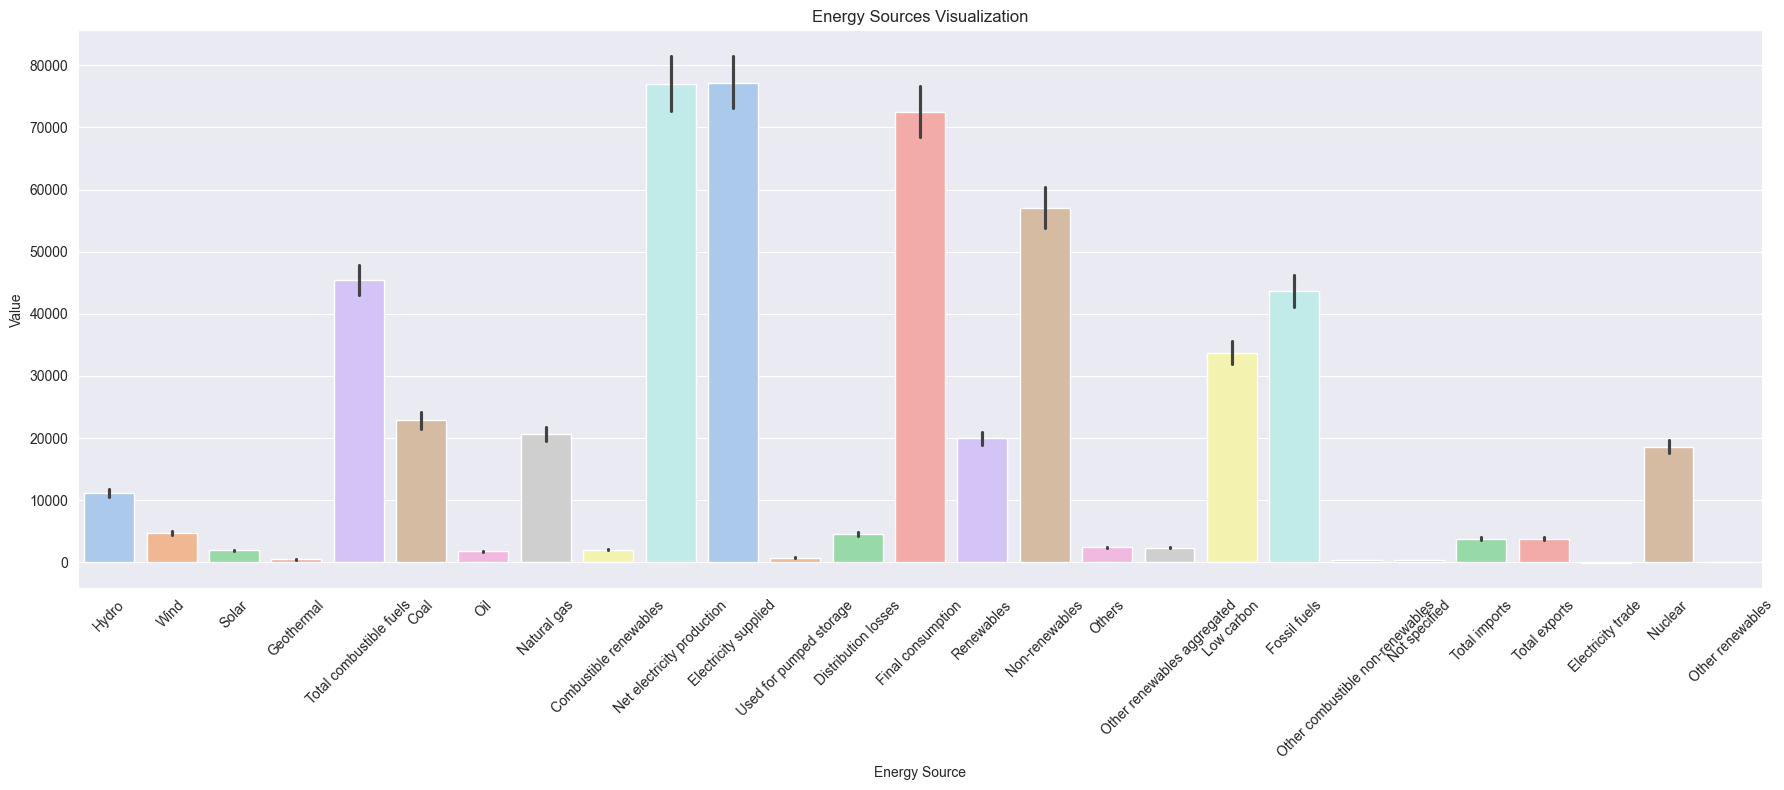

In [9]:
plt.figure(figsize=(18, 8))
sns.barplot(data, x='product', y='value', palette="pastel")
plt.title('Energy Sources Visualization')
plt.xlabel('Energy Source')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
source_data=data.groupby('product')['value'].mean().sort_values(ascending=False)
source_data

product
Electricity supplied                77095.277430
Net electricity production          77042.326254
Final consumption                   72472.276631
Non-renewables                      57103.950645
Total combustible fuels             45414.537649
Fossil fuels                        43636.402937
Low carbon                          33663.675374
Coal                                22922.313912
Natural gas                         20657.444164
Renewables                          19938.038980
Nuclear                             18536.523333
Hydro                               11202.462767
Wind                                 4737.435072
Distribution losses                  4574.260803
Total imports                        3811.218535
Total exports                        3763.800048
Others                               2400.804758
Other renewables aggregated          2366.258506
Combustible renewables               2070.003120
Solar                                1931.772528
Oil         

In [11]:
german=data.loc[data['country']=='Germany'] 
german

,country,year,month,month_name,product,value,display_order,yeartodate,previousyeartodate,share
233,Germany,2010,1,January,Hydro,2078.530000,1,26969.001000,NaN,0.037074
234,Germany,2010,1,January,Wind,2906.482000,2,37793.002000,NaN,0.051842
235,Germany,2010,1,January,Solar,423.832000,3,11728.998000,NaN,0.007560
236,Germany,2010,1,January,Geothermal,2.123000,4,20.000000,NaN,0.000038
237,Germany,2010,1,January,Nuclear,12537.344000,6,132971.002000,NaN,0.223625
...,...,...,...,...,...,...,...,...,...,...
181150,Germany,2022,12,December,Non-renewables,29011.626347,23,302505.986064,327805.999040,0.612165
181151,Germany,2022,12,December,Others,927.535003,24,11570.050954,12555.160723,0.019572
181152,Germany,2022,12,December,Other renewables aggregated,3872.873679,25,45097.523341,48492.454154,0.081720
181153,Germany,2022,12,December,Low carbon,21160.099908,26,283742.328405,301929.718065,0.446492
